In [ ]:
#matlab numpy conversion http://mathesaurus.sourceforge.net/matlab-numpy.html

In [122]:
%pylab inline
import scipy as sp

Populating the interactive namespace from numpy and matplotlib


In [123]:
def nrmse(output,target):
    combinedVar = 0.5 * (np.var(target, ddof=1) + np.var(output, ddof=1))
    errorSignal = output - target
    return np.sqrt(np.mean(errorSignal ** 2) / combinedVar)

In [124]:
import scipy.io as spio
matPath = "/Users/ck84/Documents/MATLAB/conceptorsMatlab4JMRL/canned3DimDemoNet.mat"
matData = spio.loadmat(matPath)
Wbias = matData['Wbias']
Win = matData['Win']
Wstar = matData['Wstar']
matData

{'Wbias': array([[-0.07111584],
        [-0.07624716],
        [-0.04747009]]), 'Win': array([[-1.03753005],
        [-1.83356646],
        [ 0.7684733 ]]), 'Wstar': <3x3 sparse matrix of type '<class 'numpy.float64'>'
 	with 7 stored elements in Compressed Sparse Column format>, '__globals__': [], '__header__': b'MATLAB 5.0 MAT-file, Platform: MACI, Created on: Wed Aug 26 19:35:13 2015', '__version__': '1.0'}

In [125]:
a = np.random.randn(5,5) * (np.random.random((5,5)) < 0.3)



In [126]:
def generateInternalWeights(nInternalUnits, connectivity):
    success = False
    internalWeights = 0
    while success == False:
        try:
            internalWeights = np.random.randn(nInternalUnits,nInternalUnits) * (np.random.random((nInternalUnits,nInternalUnits)) < connectivity)
            specRad = abs(np.linalg.eig(internalWeights)[0][0])
            if (specRad > 0):
                internalWeights = internalWeights / specRad
                success = True
        except e:
            print(e)
    return internalWeights
            
            
        

In [173]:
freq = 2000
waveLength = 1 / freq
waveLengthSamples = waveLength * 44100
print("Wavelen: ", waveLength, " secs , " ,waveLengthSamples, ", samples")


Wavelen:  0.0005  secs ,  22.05 , samples


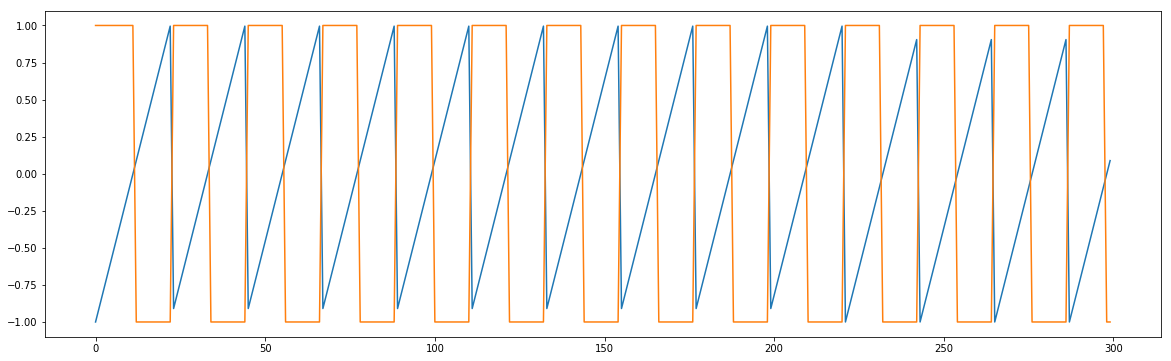

In [216]:
pSaw = lambda n: (round(n % waveLengthSamples) / waveLengthSamples * 2) - 1.0
plot([pSaw(x) for x in arange(300)])
pPulse = lambda n: (((n % waveLengthSamples) < (waveLengthSamples * 0.5)) * 2) - 1.0
plot([pPulse(x) for x in arange(300)])


In [225]:
N = 100 # network size
NetSR = 1.6 # spectral radius of initial reservoir weight matrix
NetinpScaling = NetSR # scaling of input weights
BiasScaling = 0.3 # size of bias

# loading learning
TychonovAlpha = .0001 # regularizer for  W training
washoutLength = 100
learnLength = 500
signalPlotLength = 15

# pattern readout learning
TychonovAlphaReadout = .0001 # regularizer for  Wout training
learnLengthWout = 500

patterns = np.array([1,2])
# C learning and testing
alphas = np.array([10.0, 100.0]) # apertures of the conceptors
recallTestLength = 500

patt1 = lambda n: 1 * sin(2 * pi * n / 3.1504531)


period2 = 2
rawp = np.random.randn(period2)
#rawp = np.array([1.1929,2.6856]);
maxVal = np.max(rawp)
minVal = np.min(rawp)
print(rawp)
rp = 0.5 * (2 * (rawp - minVal) / (maxVal - minVal) - 1);
patt2 = lambda n: rp[mod(n, period2 )]


patts = [pSaw, pPulse]


[ 1.95704952  0.52329062]


In [226]:
Netconnectivity = 1
if N > 20:
    Netconnectivity = 10.0/N;
WstarRaw = generateInternalWeights(N, Netconnectivity)
WinRaw = np.random.randn(N, 1)
WbiasRaw = np.random.randn(N, 1)
    
#Scale raw weights     
Wstar = NetSR * WstarRaw;
Win = NetinpScaling * WinRaw;
Wbias = BiasScaling * WbiasRaw;  

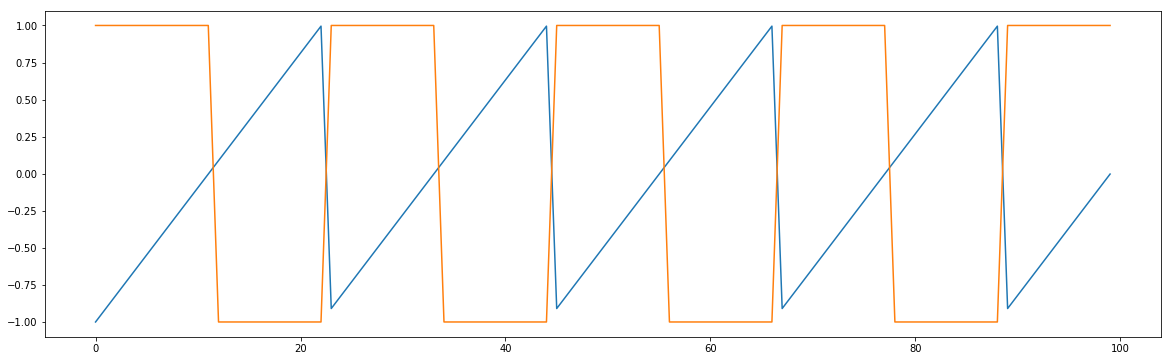

In [227]:
figsize(20,6)
plot([patts[0](x) for x in arange(100)])
plot([patts[1](x) for x in arange(100)])

In [228]:
I = np.eye(N)

In [229]:
xCollector = np.zeros((N, learnLengthWout))
pCollector = np.zeros((1, learnLengthWout))
x = np.zeros((N,1))

In [230]:
for n in arange(washoutLength + learnLength):
    u = np.random.randn() * 1.5
    #u = uCollector[0, n]
    
    x = np.tanh(Wstar * x + Win * u + Wbias)
    if n >= washoutLength:
        xCollector[:, n - washoutLength] = x[:,0]
        pCollector[0, n - washoutLength] = u
    

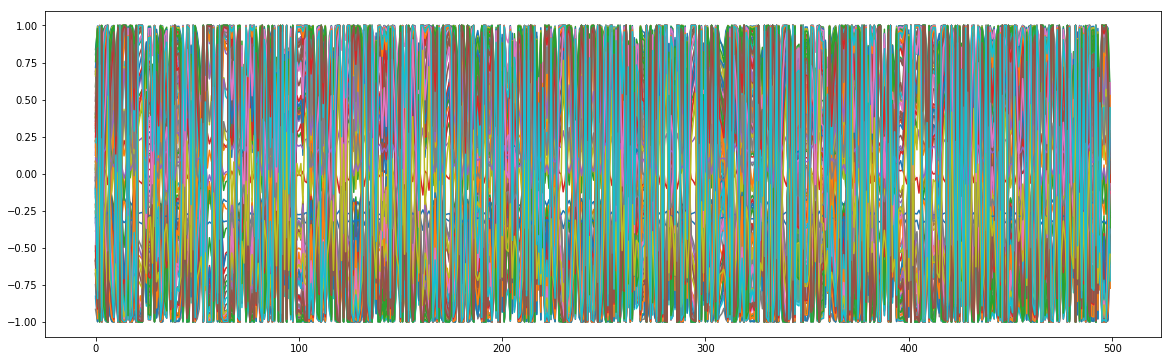

In [231]:
plot(xCollector.T)


In [232]:
Wout = linalg.inv(xCollector.dot(xCollector.conj().T) +  
                  (TychonovAlphaReadout * np.eye(N))).dot(xCollector).dot(pCollector.conj().transpose()).conj().T

In [233]:
print("NRMSE: ", nrmse(Wout.dot(xCollector), pCollector))
print("absWeight: ", mean(abs(Wout)))

NRMSE:  0.000755840927516
absWeight:  0.277486050271


In [234]:
Wout

array([[ -3.26464325e-01,   4.18335446e-01,  -3.07365569e-02,
         -1.41322825e-02,  -3.52234590e-02,   2.79665931e-02,
         -1.16478743e-01,   1.94415174e-02,  -2.47056491e-02,
          3.68850622e-02,  -2.11240813e-02,  -2.82696282e-02,
         -1.18092970e-01,  -2.96490872e+00,   8.69936549e-02,
         -2.74741151e-01,   1.92912673e-02,   6.43018110e-03,
         -9.97538559e-03,   8.38081435e-01,  -6.58265006e-02,
          1.26708293e+00,   1.48394728e-01,   3.09649320e-02,
         -3.98157193e-02,  -1.55396041e-01,   8.37292809e-03,
          3.27397024e-01,   1.05194922e-01,   3.39550658e-02,
         -1.91664191e-01,   2.47518690e-02,  -2.03316076e-01,
         -1.04509022e-03,   7.02595805e-03,   3.50402674e-02,
          3.14579960e-04,  -4.77160200e-02,   3.56265076e-01,
         -1.93223120e-03,  -1.10527949e-02,   7.69041768e-03,
          3.24297496e+00,   5.89747113e-02,   9.77468487e-02,
          2.59381171e-01,   6.56017563e-04,   6.88152404e-02,
        

In [235]:
#need to check this code...

allTrainArgs = np.zeros((N, patterns.size * learnLength))
allTrainOldArgs = np.zeros((N, patterns.size * learnLength))
allTrainTargs = np.zeros((N, patterns.size * learnLength))
allTrainOuts = np.zeros((1, patterns.size * learnLength))
xCollectors =  np.zeros((1,patterns.size), dtype=np.object)
SRCollectors =  np.zeros((1,patterns.size), dtype=np.object)
URCollectors =  np.zeros((1,patterns.size), dtype=np.object)
patternRs =  np.zeros((1,patterns.size), dtype=np.object)
train_xPL =  np.zeros((1,patterns.size), dtype=np.object)
train_pPL =  np.zeros((1,patterns.size), dtype=np.object)
startXs =  np.zeros((N,patterns.size), dtype=np.object)

for p in range(patterns.size):
    print(p)
    patt = patts[p]
    xCollector = zeros((N, learnLength))
    xOldCollector = zeros((N, learnLength))
    pCollector = zeros((1, learnLength))
    x = zeros((N,1))
    for n in range(washoutLength + learnLength):
        u = patt(n+1)
        xOld = x
        x = tanh((Wstar * x) + (Win * u) + Wbias)
        if n >= washoutLength:
            xCollector[:, n - washoutLength] = x[:,0]
            xOldCollector[:, n - washoutLength] = xOld[:,0]
            pCollector[0, n - washoutLength] = u
    
    xCollectors[0,p] = xCollector
    R = xCollector.dot(xCollector.T) / learnLength
    [Ux,sx,Vx] = svd(R)
    SRCollectors[0,p] = diag(sx)
    URCollectors[0,p] = Ux
    patternRs[0,p] = R
    
    startXs[:,p] = x[:,0]
    train_xPL[0,p] = xCollector[:,:signalPlotLength]
    train_pPL[0,p] = pCollector[0,:signalPlotLength]
    
    allTrainArgs[:, p * learnLength:(p+1) * learnLength] = xCollector
    allTrainOldArgs[:, p * learnLength:(p+1) * learnLength] = xOldCollector
    allTrainOuts[0, p * learnLength:(p+1) * learnLength] = pCollector
    allTrainTargs[:, p * learnLength:(p+1) * learnLength] = Win.dot(pCollector)
            
            
    

0
1


In [236]:
Wtargets = np.arctanh(allTrainArgs) - np.tile( Wbias, (1, patterns.size * learnLength))

W = linalg.inv(allTrainOldArgs.dot(allTrainOldArgs.conj().T) +
                  (TychonovAlpha * np.eye(N))).dot(allTrainOldArgs).dot(Wtargets.conj().T).conj().T
print("W NMRSE: ", mean(nrmse(W.dot(allTrainOldArgs), Wtargets)))
print("absSize: ", mean(mean(abs(W), axis=0)))

W NMRSE:  0.617284571664
absSize:  7.46915168064


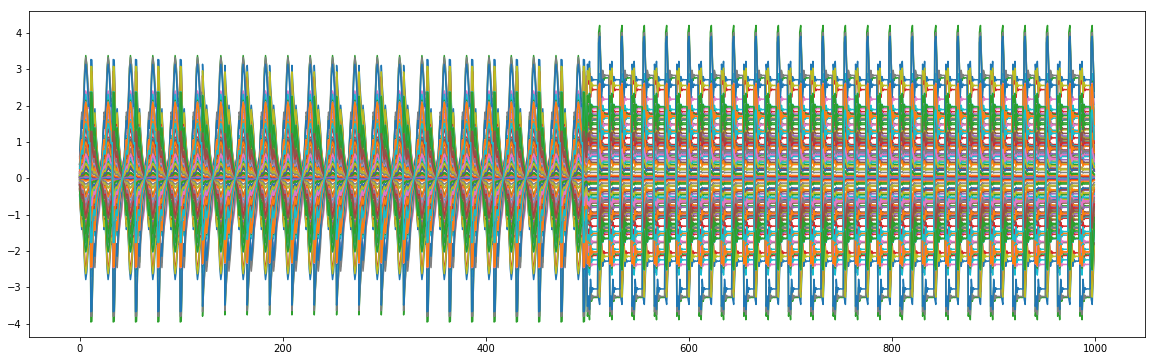

In [237]:
plot(W.dot(allTrainOldArgs).T)

In [238]:
Cs = np.zeros((4, patterns.size), dtype=np.object)
for p in range(patterns.size):
    R = patternRs[0,p]
    [U,s,V] = svd(R)
    S = diag(s)
    Snew = (S * linalg.inv(S + pow(alphas[p], -2) * np.eye(N)))
    
    C =  U.dot(Snew).dot(U.T);
    Cs[0,p] = C
    Cs[1,p] = U
    Cs[2,p] = diag(Snew)
    Cs[3,p] = diag(S)

x_CTestPL = np.zeros((3, recallTestLength, patterns.size))
p_CTestPL = np.zeros((1, recallTestLength, patterns.size))
for p in range(patterns.size):
    C = Cs[0,p]
    x = 0.5 * np.random.randn(N,1)
    for n in range(recallTestLength + washoutLength):
        x = np.tanh(W.dot(x) + Wbias)
        x = C.dot(x)
        if (n > washoutLength):
            x_CTestPL[:,n-washoutLength,p] = x[0:3].T
            p_CTestPL[:,n-washoutLength,p] = Wout.dot(x)
    

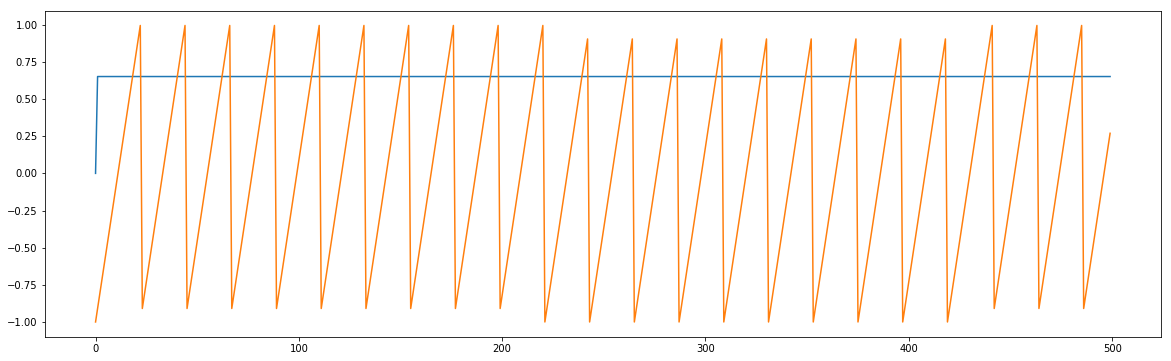

In [240]:
patIdx=0
plot(p_CTestPL[:,:,patIdx].T[:500])
plot([patts[patIdx](x) for x in arange(500)])

In [ ]:
x

In [ ]:
np.tile( Wbias, (1, patterns.size * learnLength))

In [ ]:
a = zeros((3,5), dtype=np.object)
a[:,3]

In [ ]:
mean(mean(abs(W), axis=0))

In [ ]:
q = np.random.random((3,5))
q

In [ ]:
a[:,0]

In [ ]:
q[:, 0] = a[:,0]

In [ ]:
q

In [ ]:
[U,s,V] = np.linalg.svd(np.ones((3,3)))
print U
print diag(s)
print V.T

In [ ]:
patterns